In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchtsmixer import TSMixer

In [ ]:
#df = pd.read_csv("/content/Morocco 2023-05-18 to 2024-05-17.csv")

data1 = pd.read_csv("/content/morocco 2022-01-01 to 2022-12-31.csv")
data2 = pd.read_csv("/content/morocco 2021-01-01 to 2021-12-31.csv")
data3 = pd.read_csv("/content/morocco 2023-01-01 to 2023-05-01.csv")

df = pd.concat([data1, data2, data3], axis=0)
df.reset_index(drop=True, inplace=True)


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [ ]:
data = df[['humidity', 'temp', 'precip']]

In [ ]:
data.head()

,humidity,temp,precip
datetime,,,
2022-01-01,86.2,54.2,0.004
2022-01-02,97.3,52.3,0.008
2022-01-03,97.6,52.7,0.020
2022-01-04,94.6,54.4,0.032
2022-01-05,82.8,54.2,0.016


In [ ]:
# Model parameters
sequence_length = 10
prediction_length = 5
input_channels = 3
output_channels = 3

In [ ]:
print(data.shape)

(851, 3)


In [ ]:
torch.tensor(data.to_numpy()).shape

torch.Size([851, 3])

In [ ]:
X_format = torch.tensor(data.to_numpy())[:720].reshape((-1, sequence_length+prediction_length, input_channels))
X, y = X_format[:,:sequence_length,:], X_format[:,sequence_length:,:]

In [ ]:
print(X.shape)
print(y.shape)
print(t.shape)

torch.Size([48, 10, 3])
torch.Size([48, 5, 3])
torch.Size([360, 24, 10, 3])


In [ ]:
# split to train / test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gap = 35

X_train, X_test, y_train, y_test = X[:-gap], X[-gap:], y[:-gap], y[-gap:]

In [ ]:
X_train.shape

torch.Size([13, 10, 3])

In [ ]:
y_test.shape

torch.Size([35, 5, 3])

In [ ]:
model = TSMixer(sequence_length, prediction_length, input_channels, output_channels)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
# scheduler = ReduceLROnPlateau(optimizer, 'min')

In [ ]:
# X_train = torch.randn((32,10,seq,chenn))---

num_epochs = 5000


for epoch in range(num_epochs):
    model.train()
    # for _X,_y in zip(X_train, y_train):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train.float())
    #rint(f"outputs: {outputs.shape}")
    #print(f"y_train: {y_train.shape}")
    loss = criterion(outputs, y_train.float())

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete")

Epoch [1/5000], Loss: 3458.8020
Epoch [51/5000], Loss: 72.2205
Epoch [101/5000], Loss: 79.2948
Epoch [151/5000], Loss: 60.0316
Epoch [201/5000], Loss: 61.3518
Epoch [251/5000], Loss: 55.3798
Epoch [301/5000], Loss: 23.0671
Epoch [351/5000], Loss: 23.8924
Epoch [401/5000], Loss: 17.9191
Epoch [451/5000], Loss: 13.5087
Epoch [501/5000], Loss: 9.9160
Epoch [551/5000], Loss: 8.8872
Epoch [601/5000], Loss: 6.6646
Epoch [651/5000], Loss: 7.5917
Epoch [701/5000], Loss: 7.1447
Epoch [751/5000], Loss: 5.9095
Epoch [801/5000], Loss: 5.0127
Epoch [851/5000], Loss: 4.4929
Epoch [901/5000], Loss: 7.4638
Epoch [951/5000], Loss: 4.1954
Epoch [1001/5000], Loss: 3.4967
Epoch [1051/5000], Loss: 4.6386
Epoch [1101/5000], Loss: 4.4743
Epoch [1151/5000], Loss: 3.8523
Epoch [1201/5000], Loss: 3.6097
Epoch [1251/5000], Loss: 3.2576
Epoch [1301/5000], Loss: 3.2440
Epoch [1351/5000], Loss: 3.1512
Epoch [1401/5000], Loss: 4.1312
Epoch [1451/5000], Loss: 2.1324
Epoch [1501/5000], Loss: 3.1510
Epoch [1551/5000], 

y_test: torch.Size([35, 5, 3])
counter: 0
counter: 5
counter: 10
counter: 15
counter: 20
counter: 25
counter: 30
stack_y: 7
[tensor([54.9000, 73.3000, 81.6000, 78.3000, 86.7000], dtype=torch.float64), tensor([87.8000, 87.4000, 80.6000, 92.6000, 88.2000], dtype=torch.float64), tensor([94.1000, 93.8000, 84.9000, 68.6000, 76.6000], dtype=torch.float64), tensor([88.4000, 87.3000, 83.1000, 86.0000, 83.7000], dtype=torch.float64), tensor([87.3000, 83.6000, 67.9000, 73.9000, 78.1000], dtype=torch.float64), tensor([84.4000, 85.9000, 85.0000, 77.3000, 72.3000], dtype=torch.float64), tensor([74.8000, 69.9000, 88.9000, 87.6000, 80.8000], dtype=torch.float64)]
groundtruth: torch.Size([35])
prediction: torch.Size([35])
y_test: torch.Size([35, 5, 3])
counter: 0
counter: 5
counter: 10
counter: 15
counter: 20
counter: 25
counter: 30
stack_y: 7
[tensor([82.2000, 75.9000, 73.6000, 71.6000, 72.9000], dtype=torch.float64), tensor([71.5000, 70.6000, 69.8000, 64.9000, 66.7000], dtype=torch.float64), tensor(

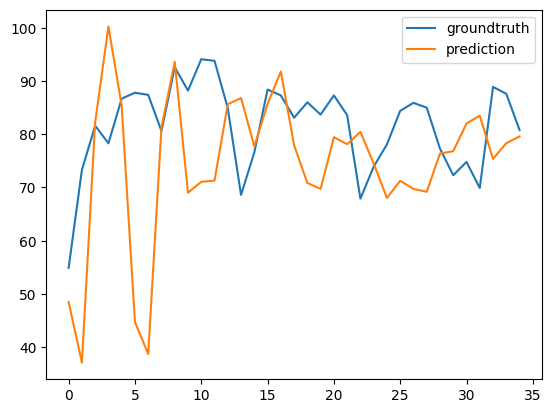

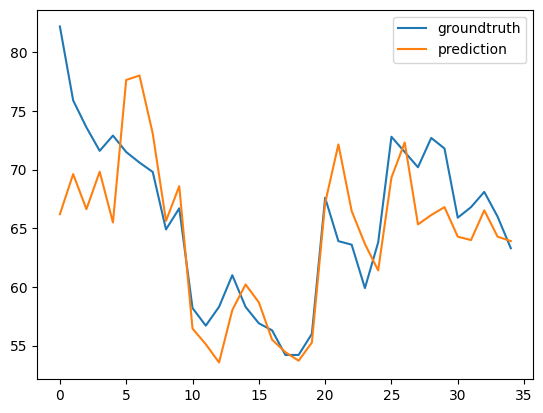

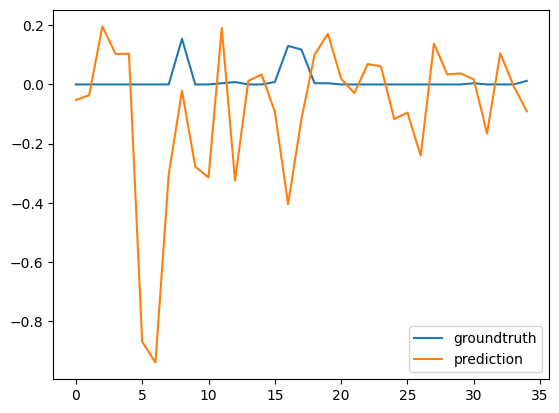

In [ ]:
outputs_test = model(X_test.float())
for i in range(3):
    plt.figure()
    counter = 0
    stack_y = []
    stack_pred = []
    print(f"y_test: {y_test.shape}")
    while True:
        print(f"counter: {counter}")
        stack_y.append(y_test[counter,:,i])
        # print(f"y_test[counter,:,i]: {y_test[counter,:,i].shape}")
        stack_pred.append(outputs_test[counter,:,i])
        counter += 5
        if counter >= y_test.shape[0]:
            break
    print(f"stack_y: {len(stack_y)}")
    print(stack_y)
    groundtruth = torch.stack(stack_y, dim=0).flatten()
    prediction = torch.stack(stack_pred, dim=0).flatten()
    print(f"groundtruth: {groundtruth.shape}")
    print(f"prediction: {prediction.shape}")
    plt.plot(groundtruth, label='groundtruth')
    plt.plot(prediction.detach().cpu().numpy(), label='prediction')
    plt.legend()
plt.show()




In [ ]:
y_test.shape

torch.Size([10, 5, 3])

In [ ]:
0.2*len(data)

146.0

In [ ]:
146//5

29